In [1]:
import torch
from PIL import Image
import numpy as np

from utils import img2tensor, tensor2img, img_resize
from model import MultiLevelAE_OST

In [2]:
device = torch.device('cuda')
    
model = MultiLevelAE_OST().to(device)

In [52]:
# parameters to control style transfer

content_size_mult = 1.7 # multiplier for content image size
style_size_mult = 1.2  # multiplier for style image size, affects the size of style "brushes"
alpha = 1 # interpolation between original and transfered images (0 means keep original image)

In [53]:
c = Image.open('content/brad_pitt.jpg').convert('RGB')
s = Image.open('style/picasso_self_portrait.jpg').convert('RGB')

c = img_resize(c, content_size_mult)
s = img_resize(s, style_size_mult)

c_tensor = img2tensor(c).to(device)
s_tensor = img2tensor(s).to(device)

In [54]:
with torch.no_grad():
    out = model(c_tensor, s_tensor, alpha)

In [55]:
res = tensor2img(out)

In [56]:
demo = Image.new('RGB', (c.width * 2, c.height))
res = res.resize(c.size)
s = s.resize((i // 4 for i in c.size))

demo.paste(c, (0, 0))
demo.paste(res, (c.width, 0))
demo.paste(s, (c.width, c.height - s.height))

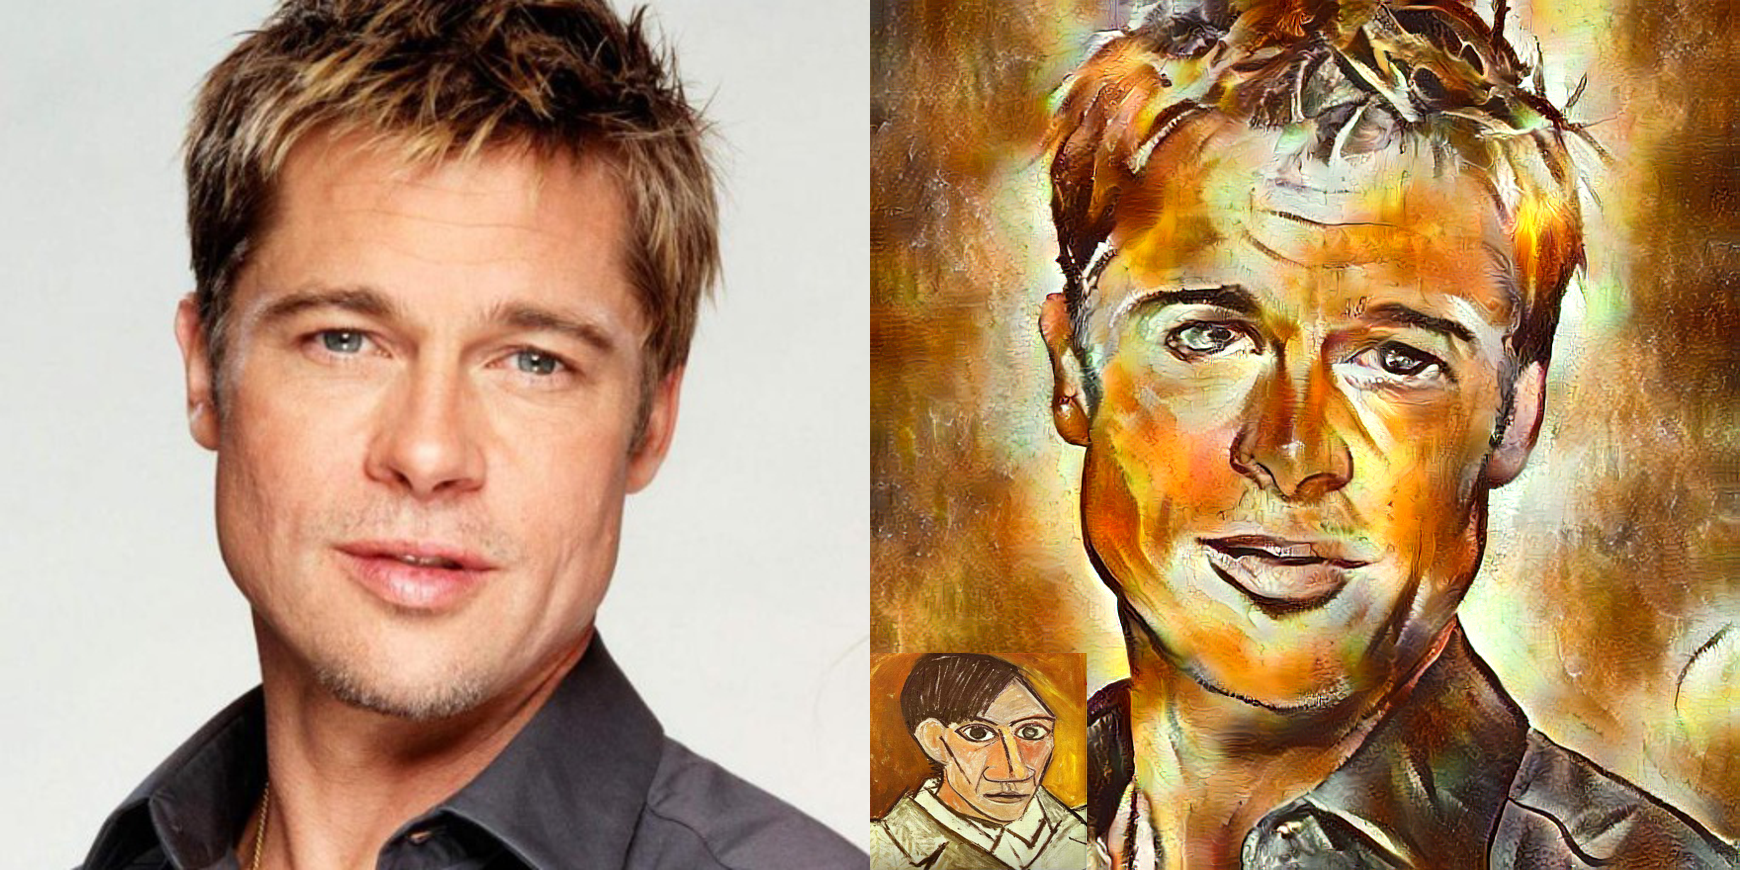

In [57]:
demo